In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('data/flight_price.xlsx',)

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.shape 

(10683, 11)

In [6]:
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
df.dropna(inplace=True)

In [8]:
df.shape 

(10682, 11)

In [9]:
df.duplicated().sum()

220

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape 

(10462, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
df.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


<Figure size 3000x3000 with 0 Axes>

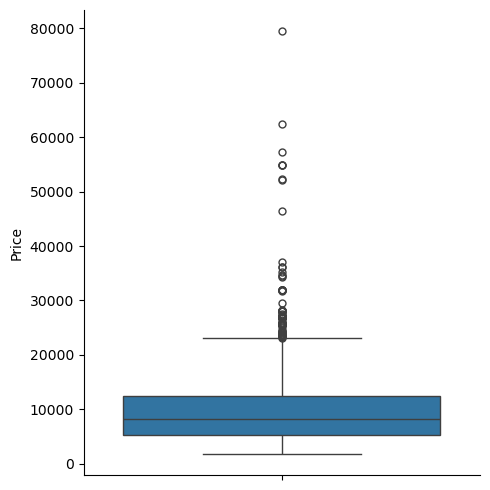

In [15]:
plt.figure(figsize=(30,30))
sns.catplot(df['Price'],kind='box')
plt.show()

In [16]:
# check how many outliers
minimum, q1 , q2 , q3 , maximum = df['Price'].quantile([0,0.25,0.5,0.75,1])

In [17]:
IQR=q3-q1

In [18]:
lower_fence= q1-1.5*IQR
upper_fenec=q1+1.5*IQR

outliers=[]
for i in df['Price']:
    if i<lower_fence or i > upper_fenec:
        outliers.append(i)

print(len(outliers))

500


In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [20]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [21]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

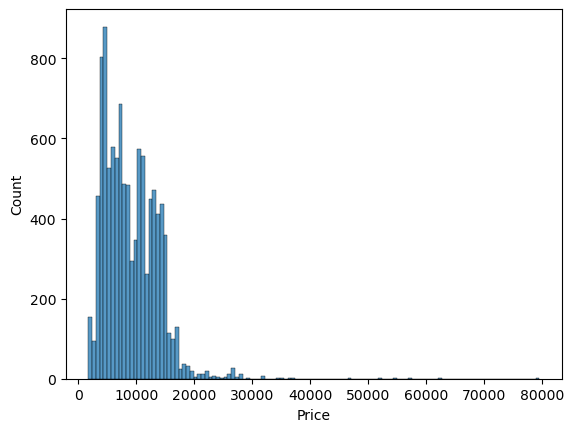

In [22]:
sns.histplot(df['Price'])
plt.show()

In [23]:
df['Day']=df['Date_of_Journey'].str.split('/')

In [24]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  Day              10462 non-null  object
 12  Date             10462 non-null  int32 
 13  Month            10462 non-null  int32 
 14  Year             10462 non-null  int32 
dtypes: int32(3), int64(1), object(11)
memory usage: 1.2+ MB


In [27]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [28]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019


In [29]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [30]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019


In [31]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_minute']=df['Arrival_Time'].str.split(':').str[1]

In [32]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019,21,35


In [33]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [34]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019,21,35


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Duration         10462 non-null  object
 6   Total_Stops      10462 non-null  object
 7   Additional_Info  10462 non-null  object
 8   Price            10462 non-null  int64 
 9   Day              10462 non-null  object
 10  Date             10462 non-null  int32 
 11  Month            10462 non-null  int32 
 12  Year             10462 non-null  int32 
 13  Arrival_hour     10462 non-null  object
 14  Arrival_minute   10462 non-null  object
dtypes: int32(3), int64(1), object(11)
memory usage: 1.2+ MB


In [36]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_minute']=df['Arrival_minute'].astype(int)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019,21,35


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Duration         10462 non-null  object
 6   Total_Stops      10462 non-null  object
 7   Additional_Info  10462 non-null  object
 8   Price            10462 non-null  int64 
 9   Day              10462 non-null  object
 10  Date             10462 non-null  int32 
 11  Month            10462 non-null  int32 
 12  Year             10462 non-null  int32 
 13  Arrival_hour     10462 non-null  int32 
 14  Arrival_minute   10462 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.1+ MB


In [38]:
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_Min']=df['Dep_Time'].str.split(':').str[1].astype(int)

In [39]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019,21,35,16,50


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Duration         10462 non-null  object
 6   Total_Stops      10462 non-null  object
 7   Additional_Info  10462 non-null  object
 8   Price            10462 non-null  int64 
 9   Day              10462 non-null  object
 10  Date             10462 non-null  int32 
 11  Month            10462 non-null  int32 
 12  Year             10462 non-null  int32 
 13  Arrival_hour     10462 non-null  int32 
 14  Arrival_minute   10462 non-null  int32 
 15  Dep_Hour         10462 non-null  int32 
 16  Dep_Min          10462 non-null  int32 
dtypes: int32(7), int64(1), object(9)
mem

In [41]:
df.drop('Dep_Time',axis=1,inplace=True)

In [42]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019,21,35,16,50


In [43]:
# we have source and destination so we will drop Route
df.drop('Route',axis=1,inplace=True)

In [44]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019,21,35,16,50


In [45]:
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [46]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Min,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019,21,35,16,50,4


In [47]:
df['Duration_minute']=df['Duration'].str.split(' ').str[1]

In [48]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019,13,15,5,50,7,25m
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019,23,30,18,5,5,25m
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019,21,35,16,50,4,45m


In [59]:
# df[df['Duration_minute'].isna()]['Duration_minute']

df['Duration_minute'].fillna(value=0,inplace=True)

In [60]:
df.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,"[24, 03, 2019]",24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,"[1, 05, 2019]",1,5,2019,13,15,5,50,7,25m
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,"[9, 06, 2019]",9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,"[12, 05, 2019]",12,5,2019,23,30,18,5,5,25m
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,"[01, 03, 2019]",1,3,2019,21,35,16,50,4,45m


In [61]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [65]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [66]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [67]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [68]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [70]:
encoder.fit_transform(df[['Destination','Source','Airline']]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [72]:
df_temp=pd.DataFrame(encoder.fit_transform(df[['Destination','Source','Airline']]).toarray(),columns=encoder.get_feature_names_out())

In [73]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [74]:
df=pd.concat([df,df_temp],axis=1)

In [75]:
df.head()

,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Year,Arrival_hour,Arrival_minute,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,2h 50m,0.0,No info,3897.0,"[24, 03, 2019]",24.0,3.0,2019.0,1.0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7h 25m,2.0,No info,7662.0,"[1, 05, 2019]",1.0,5.0,2019.0,13.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19h,2.0,No info,13882.0,"[9, 06, 2019]",9.0,6.0,2019.0,4.0,25.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5h 25m,1.0,No info,6218.0,"[12, 05, 2019]",12.0,5.0,2019.0,23.0,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4h 45m,1.0,No info,13302.0,"[01, 03, 2019]",1.0,3.0,2019.0,21.0,35.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
